In [68]:
try :
    # % tensorflow_version only exists in Colab .
    % tensorflow_version 2. x
except Exception :
    pass

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import stockstats
import os
import matplotlib.pyplot as plt

from lib.rens import rens

In [14]:
def create_dataset(dataset, look_back = 2):
  
    dataX = []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back)])

        dataX = np.array([dataset.iloc[i] for i in range(len(dataset)-look_back)])
        dataY = np.array([dataset[i+look_back] for i in range(len(dataset)-look_back)])

        # dataX = dataX/np.amax(dataX)
        # dataY = dataY/np.amax(dataY)
        # (nb_sequences, size_sequence, nb_channels)
        dataX = np.reshape(dataX, (dataset.shape[0]-look_back, look_back, 1))
        return np.array(dataX), np.array(dataY)

In [3]:
def make_ready(filer):
    for i, fil in enumerate(filer):
        print(f"{i+1} av {len(filer)} renset" ,end='\r')
        data = cleanup.clean_data(pd.read_excel(fil))
        stock = stockstats.StockDataFrame.retype(data)
        indikatorer = ['rsi_20', 'trix', 'open_8_sma', 'open_16_sma', 'macds', 'open_30_sma']
        for ind in indikatorer:
            stock.get(ind)
        stock['sma8-16'] = [stock.open_8_sma[i] - stock.open_16_sma[i] for i, value in enumerate(stock.open_8_sma)]
        stock['sma30_derivert'] = [stock.open_30_sma[i] / stock.open_30_sma[i-1] if i>1 else 1 
                                   for i, value in enumerate(stock.open_30_sma)]

        #evaluate_trades(stock)
        break # må tas bort ettervært
    
    return stock

    
def add_data(word):
    ordet = 'data/' + word
    return ordet

In [4]:
cleanup = rens()

In [12]:
filer = list(map(add_data, os.listdir('data/')))[4:5] # 60 første er lagd til å bygge modell
data = make_ready(filer)
data

C:\Users\Stian\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


,tid,open,close,high,low,volume,amount,close_-1_s,close_-1_d,rs_20,rsi_20,trix,open_8_sma,open_16_sma,macd,macds,macdh,open_30_sma,sma8-16,sma30_derivert
0,9:0,154.30,154.30,154.30,154.30,19041,19041,NaN,NaN,NaN,NaN,NaN,154.300000,154.300000,0.000000,0.000000,0.000000,154.300000,0.000000,1.000000
1,9:1,153.40,153.40,153.40,153.40,9073,9073,154.30,-0.90,0.000000,0.000000,-0.092699,153.850000,153.850000,-0.020192,-0.011218,-0.008974,153.850000,0.000000,1.000000
2,9:2,154.50,154.50,154.50,154.50,11473,11473,153.40,1.10,1.286550,56.265985,-0.026206,154.066667,154.066667,0.008382,-0.003185,0.011567,154.066667,0.000000,1.001408
3,9:3,152.85,152.85,152.85,152.85,11400,11400,154.50,-1.65,0.424409,29.795424,-0.036276,153.762500,153.762500,-0.038400,-0.015114,-0.023286,153.762500,0.000000,0.998026
4,9:4,153.50,153.50,153.50,153.50,1324,1324,152.85,0.65,0.702289,41.255560,-0.035721,153.710000,153.710000,-0.037147,-0.021669,-0.015479,153.710000,0.000000,0.999659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,16:16,149.50,149.50,149.50,149.50,6470,6470,149.25,0.25,0.830436,45.368205,-0.020484,149.256250,149.450000,-0.187746,-0.180478,-0.007268,149.686667,-0.193750,1.000056
406,16:17,149.50,149.50,149.50,149.50,6808,6808,149.50,0.00,0.830436,45.368205,-0.019663,149.262500,149.428125,-0.163871,-0.177157,0.013286,149.696667,-0.165625,1.000067
407,16:18,149.65,149.65,149.65,149.65,961,961,149.50,0.15,0.955063,48.850752,-0.017988,149.312500,149.415625,-0.131332,-0.167992,0.036660,149.696667,-0.103125,1.000000
408,16:19,150.00,150.00,150.00,150.00,4208,4208,149.65,0.35,1.261164,55.774998,-0.014985,149.412500,149.425000,-0.076421,-0.149678,0.073256,149.701667,-0.012500,1.000033


In [15]:
new_data = create_dataset(data.open.astype('float32'))
new_data

ValueError: cannot reshape array of size 408 into shape (408,2,1)

In [38]:
data.open.head(10)

0    154.30
1    153.40
2    154.50
3    152.85
4    153.50
5    153.90
6    154.50
7    153.95
8    154.50
9    154.60
Name: open, dtype: float64

In [58]:
lookback = 1
datax = []
datay = []
for i,v in enumerate(data.open):
    if i > lookback:
        datax.append([data.open[i-j] for j in range(lookback, 0, -1)])
        datay.append(data.open[i])    
    
datax = np.array(datax)
datay = np.array(datay)

In [60]:
# reshape input to be [samples, time steps, features]
datax = np.reshape(datax, (datax.shape[0], 1, datax.shape[1]))


In [62]:
datax.shape

(408, 1, 1)

In [83]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(input_dim=1, units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(input_dim=100, units=200, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='linear'))

In [75]:
model.compile(optimizer='rmsprop', loss='mean_squared_error')

In [76]:
model.fit(datax, datay, epochs=150, batch_size=50, validation_split=0.2)

Train on 326 samples, validate on 82 samples
Epoch 1/150
326/326 [==============================] - 5s 14ms/sample - loss: 23281.2080 - val_loss: 22224.1477
Epoch 2/150
326/326 [==============================] - 0s 177us/sample - loss: 22880.6083 - val_loss: 21731.6400
Epoch 3/150
326/326 [==============================] - 0s 168us/sample - loss: 22285.6303 - val_loss: 20970.5322
Epoch 4/150
326/326 [==============================] - 0s 168us/sample - loss: 21433.3201 - val_loss: 20096.7564
Epoch 5/150
326/326 [==============================] - 0s 174us/sample - loss: 20576.7024 - val_loss: 19226.4918
Epoch 6/150
326/326 [==============================] - 0s 208us/sample - loss: 19656.8991 - val_loss: 18370.5249
Epoch 7/150
326/326 [==============================] - 0s 208us/sample - loss: 18870.9026 - val_loss: 17693.2848
Epoch 8/150
326/326 [==============================] - 0s 174us/sample - loss: 18228.9362 - val_loss: 17167.1781
Epoch 9/150
326/326 [==============================]

326/326 [==============================] - 0s 174us/sample - loss: 3653.1603 - val_loss: 3241.6204
Epoch 74/150
326/326 [==============================] - 0s 162us/sample - loss: 3552.9121 - val_loss: 3123.5376
Epoch 75/150
326/326 [==============================] - 0s 168us/sample - loss: 3412.7894 - val_loss: 3007.7935
Epoch 76/150
326/326 [==============================] - 0s 153us/sample - loss: 3253.9230 - val_loss: 2894.4760
Epoch 77/150
326/326 [==============================] - 0s 156us/sample - loss: 3140.0762 - val_loss: 2783.2230
Epoch 78/150
326/326 [==============================] - 0s 156us/sample - loss: 3082.0370 - val_loss: 2673.9027
Epoch 79/150
326/326 [==============================] - 0s 153us/sample - loss: 2926.5858 - val_loss: 2567.2083
Epoch 80/150
326/326 [==============================] - 0s 153us/sample - loss: 2805.5789 - val_loss: 2462.5445
Epoch 81/150
326/326 [==============================] - 0s 153us/sample - loss: 2723.6671 - val_loss: 2360.1644
Epoch

326/326 [==============================] - 0s 162us/sample - loss: 31.0143 - val_loss: 5.9841
Epoch 148/150
326/326 [==============================] - 0s 174us/sample - loss: 30.3055 - val_loss: 7.0943
Epoch 149/150
326/326 [==============================] - 0s 153us/sample - loss: 35.9215 - val_loss: 8.5227
Epoch 150/150
326/326 [==============================] - 0s 174us/sample - loss: 34.4125 - val_loss: 8.3144


In [77]:
predict = model.predict(datax)

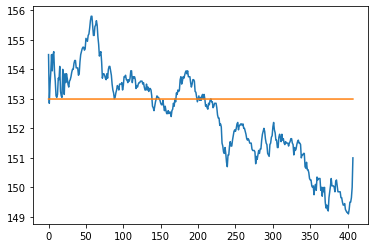

In [78]:
plt.plot(datay)
plt.plot(predict)

In [79]:
predict

array([[152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.99388],
       [152.99388],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
       [152.9939 ],
